In this Notebook, I'll explore my dataset with *Principal Component Analysis (PCA)* from Scikit-Learn.

The goal is to see if PCA might help in reducing the dataset size doing a linear combination of my features and finding the one that could explain most of the variance.

This Notebook is inspired from the information found on PCA in this [article](https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0) and the code I've written during my [project Course #4: Data Exploration](https://github.com/epfl-extension-school/project-adsml19-c4-s11-3871-2111/blob/master/02%20-%20Data%20exploration.ipynb)


In [1]:
# Load my_utils.ipynb in Notebook
from ipynb.fs.full.my_utils import *

Opening connection to database
Add pythagore() function to SQLite engine
Fraction of the dataset used to train models: 10.00%
my_utils library loaded :-)


# Load features

> Note: For this PCA analysis, I will use the full dataset by setting the *frac* parameter to value 1 in the *load_Xy_as_dict()* function call.

In [2]:
# load train X/y data matrix
data=load_Xy_as_dict(frac=1)

# Store features in X variable
X=data['all']['X']


Loading dataset...
Splitting dataset...
Load and split process terminated
  Shape of X train variable: (1141132, 38)
  Shape of y train variable: (1141132,)
  Shape of X valid variable: (285283, 38)
  Shape of y valid variable: (285283,)
  Shape of X variable   : (1426415, 38)
  Shape of y variable   : (1426415,)


# Scale data

PCA algorithm is very sensitive to the relative ranges of the features, for that reason we should scale it.


In [3]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X)
X_scaled=transformer.transform(X)


# Fit and Transform

Now that we have a *scaled* feature matrix, fit it to PCA and transform it.

As I'd like to identify the number of *Principal Components* I should keep to explain most of the variance, I'll then set *n_components* parameter to *None*, which is equivalent to setting it to the number of features in the dataset.

In [4]:
from sklearn.decomposition import PCA

pca=PCA(n_components=None)

pca.fit(X_scaled)

X_pca=pca.transform(X_scaled)

# Plot the PCA Eigenvalues

After fitting PCA with all features, I'll use the *PCA.explained_variance_* property to get the *Eigenvalues* of each components built by the PCA fitting process.


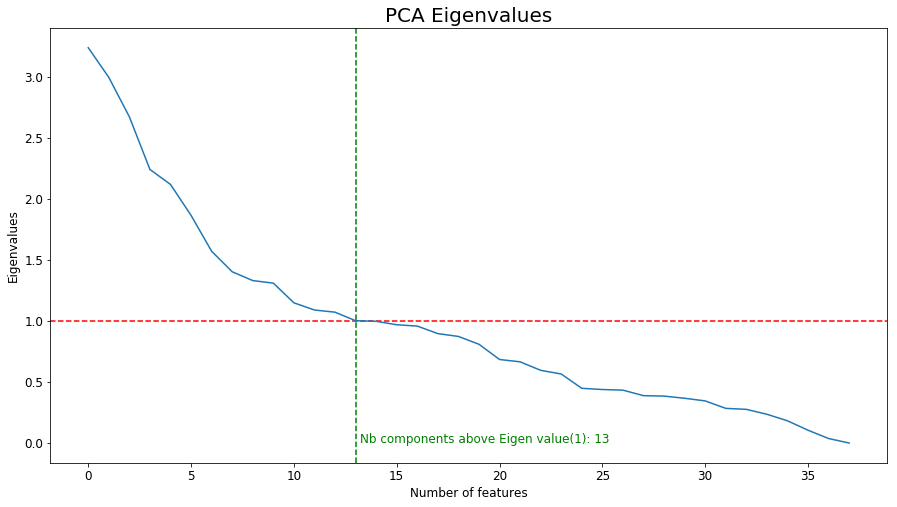

In [5]:
# Get the first component id that is below 1
eigen_limit=0
for i, value in zip(list(range(0,len(pca.explained_variance_))), pca.explained_variance_):
    if value < 1:
        eigen_limit=i-1
        break

# Set some plot parameters
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 12})
plt.style.context('seaborn-whitegrid')

# Set axis labels ant title
plt.ylabel('Eigenvalues')
plt.xlabel('Number of features')
plt.title('PCA Eigenvalues', fontsize=20)

# Define Y axis limit
plt.ylim=(0,max(pca.explained_variance_))

# Draw an horizontal line where Eigenvalue = 1
plt.axhline(y=1, color='r', linestyle='--')

# Plot a vertical line to delimite compnents below or above 1
plt.axvline(x=eigen_limit, color='g', linestyle='--')
plt.text(eigen_limit + 0.2, 0, f'Nb components above Eigen value(1): {eigen_limit}', color='g')

# Plot Eigenvalues
plt.plot(pca.explained_variance_)

# Show canvas
plt.show()


PCA theory says that using the primary components that have an Eigenvalue above 1.0 is enough to explain most of the variance, wich in my case is 13.

Let's draw another type of plotting function that displays how many principal components could explain any percentage of the variance: The ScreePlot.


# Draw a Screeplot

A Scree plot draws the ratio cumulative sum of the explained variance and helps identify how many components we must keep to get a specific percentage of variance.


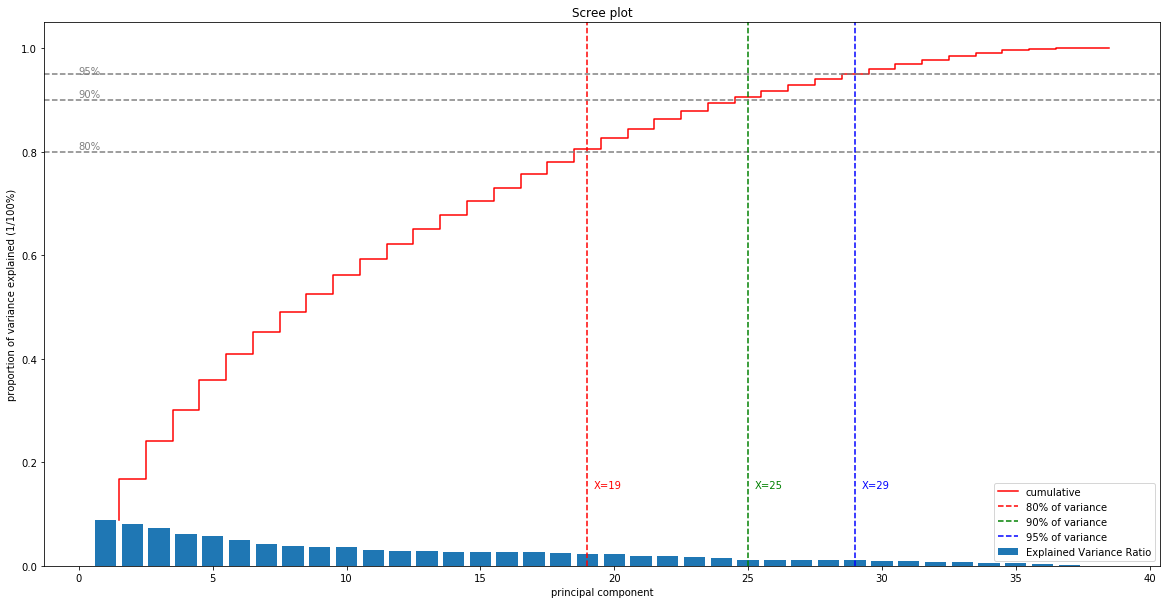

In [6]:
# Get explained variance ratio
pve=pca.explained_variance_ratio_

# Build its cumulative sum
pve_cumsum = np.cumsum(pve)

# Set some plot parameters
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 10})

# Create bar plot with explained variance ration
xcor = np.arange(1, len(pve) + 1) # 1,2,..,n_components
plt.bar(xcor, pve, label='Explained Variance Ratio')

# Create a step graph using the cummulated value of explained vsariance ratio
plt.step(
    xcor+0.5, # 1.5,2.5,..,n_components+0.5
    pve_cumsum, # Cumulative sum
    label='cumulative',
    color='r'
)

# Draw horizontal lines every y = y + 0.1
for i in np.arange(0.1, 1.1, 0.1).tolist():
    #plt.plot([0,50], [i, i], label='{}% of variance'.format(int(i*100)))
    pass

for (variance, color) in zip([80, 90, 95], ['r', 'g', 'b']):
    i=1
    for cumsum in pve_cumsum:
        if cumsum > variance/100:
            # Draw vertical line were variance explained = 95%
            plt.axvline(x=i, color=color, linestyle='--', label=f'{variance}% of variance')
            plt.text(i+0.25,0.15,f'X={i}', color=color)
            
            # Draw horizontal line
            plt.axhline(y=variance/100, linestyle='--', color='grey')
            plt.text(0, cumsum, f'{variance}%', color='grey')

            break
        i=i+1



# Set axis labels and title
plt.xlabel('principal component')
plt.ylabel('proportion of variance explained (1/100%)')
plt.title('Scree plot')

# Show legend
plt.legend()

# Show canvas
plt.show()

Smart graph, isn't it ?

I can conclude that PCA should be tried in Machine Learning training pipelines as 90% of the variance is explained using half of the features.

In the next Notebooks, dedicated to model training, I will include in grid search process different PCA reduction as grid parameter.


# This is the end of EDA

Data preparation and EDA is now terminated.

It's time now to go to the [Machine Learning chapter](30.Machine%20Learning%20Models.ipynb) and train our models.